# Predicting india's CO2 Emissions from Solid Fuel Consumption Using Climate Change Indicators.

<p>The dataset, sourced from The Humanitarian Data Exchange (HDX), spans from 1960 to 2021, encompassing diverse climate change indicators in India. With 77 columns initially, the dataset was refined to 25 columns, focusing on data spanning at least 45 years. These indicators include agricultural land percentage, CO2 emissions, renewable energy consumption, and more. The comprehensive dataset serves as a valuable resource for conducting in-depth analyses and training deep learning models to predict CO2 emissions based on fuel consumption .</p>

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.4 MB/s eta 0:00:00


# Importing necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from keras.callbacks import EarlyStopping



# Loading Data and Converting into DataFrame.

In [ ]:
data = pd.read_csv('/content/climate_india.csv')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,sno,country,year,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Agriculture, forestry, and fishing, value added (% of GDP)","Population, total",Population in urban agglomerations of more than 1 million (% of total population),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,...,CO2 emissions from liquid fuel consumption (% of total),CO2 intensity (kg per kg of oil equivalent energy use),Cereal yield (kg per hectare),Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),"Foreign direct investment, net inflows (% of GDP)",CO2 emissions from liquid fuel consumption (kt),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from gaseous fuel consumption (% of total)
0,1,India,1960,242.8,NaN,41.741335,445954579.0,7.629440,NaN,79932899.0,...,16.139038,NaN,NaN,NaN,NaN,NaN,NaN,19460.769,0.000,0.000000
1,2,India,1961,239.3,2.905442,41.092482,456351876.0,7.707028,NaN,82289370.0,...,16.354996,NaN,947.3,58.843195,1749520.0,52.403647,NaN,21327.272,3.667,0.002812
2,3,India,1962,236.1,3.337905,39.065969,467024193.0,7.790802,NaN,85082467.0,...,17.360188,NaN,929.7,59.357794,1764820.0,52.704334,NaN,24906.264,11.001,0.007668
3,4,India,1963,233.2,3.330305,39.825352,477933619.0,7.876721,NaN,87963683.0,...,17.606321,NaN,965.8,59.247475,1761540.0,52.963316,NaN,27128.466,11.001,0.007140
4,5,India,1964,230.4,3.328228,41.343717,489059309.0,7.965645,NaN,90940579.0,...,18.682148,NaN,993.6,59.435152,1767120.0,53.051436,NaN,28144.225,22.002,0.014605


# Exploratory Data Analysis (EDA).

In [ ]:
df.shape

(64, 24)

In [ ]:
df.describe()

,sno,year,"Mortality rate, under-5 (per 1,000 live births)",Population growth (annual %),"Agriculture, forestry, and fishing, value added (% of GDP)","Population, total",Population in urban agglomerations of more than 1 million (% of total population),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),...,CO2 emissions from liquid fuel consumption (% of total),CO2 intensity (kg per kg of oil equivalent energy use),Cereal yield (kg per hectare),Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),"Foreign direct investment, net inflows (% of GDP)",CO2 emissions from liquid fuel consumption (kt),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from gaseous fuel consumption (% of total)
count,64.000000,64.000000,62.000000,62.000000,63.000000,6.300000e+01,64.000000,3.100000e+01,6.300000e+01,63.000000,...,48.000000,44.000000,62.000000,61.000000,6.100000e+01,61.000000,53.000000,57.000000,57.000000,57.000000
mean,32.500000,1991.500000,131.259677,2.983901,27.756363,9.079334e+08,11.413035,2.193435e+06,2.502806e+08,25.865857,...,25.817349,1.929821,1972.719355,60.433378,1.796799e+06,53.804786,0.800954,192862.326667,28943.245000,2.700529
std,18.618987,18.618987,67.330412,0.496268,9.280000,3.067577e+08,2.493673,7.271134e+05,1.287808e+08,5.141735,...,4.110768,0.351846,789.076247,0.504468,1.499880e+04,0.927139,0.890811,160150.539086,32594.268455,2.051034
min,1.000000,1960.000000,30.600000,2.024671,16.031631,4.459546e+08,7.629440,1.237963e+06,7.993290e+07,17.924000,...,16.139038,1.344787,854.400000,58.843195,1.749520e+06,51.946881,-0.029682,19460.769000,0.000000,0.000000
25%,16.750000,1975.750000,71.925000,2.598915,17.473235,6.304878e+08,9.300321,1.589353e+06,1.355953e+08,21.504500,...,24.575794,1.609805,1231.925000,60.219813,1.790449e+06,53.051436,0.045628,61799.951000,1360.457000,0.586422
50%,32.500000,1991.500000,124.700000,2.921575,27.584888,8.889418e+08,11.251096,1.966216e+06,2.291514e+08,25.778000,...,26.568119,1.944940,1975.550000,60.459305,1.797570e+06,53.923564,0.594986,133724.489000,15218.050000,2.884589
75%,48.250000,2007.250000,194.650000,3.238137,35.887030,1.181033e+09,13.198907,2.866799e+06,3.512242e+08,29.737500,...,28.273318,2.162765,2547.225000,60.834995,1.808740e+06,54.684026,1.507316,296858.318000,47634.330000,4.564567
max,64.000000,2023.000000,242.800000,3.881524,42.751558,1.417173e+09,16.567299,3.436072e+06,5.083684e+08,35.872000,...,32.308229,2.590953,3566.600000,61.074469,1.815860e+06,55.031128,3.620523,648956.324000,101883.928000,6.023991


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 24 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   sno                                                                                        64 non-null     int64  
 1   country                                                                                    64 non-null     object 
 2   year                                                                                       64 non-null     int64  
 3   Mortality rate, under-5 (per 1,000 live births)                                            62 non-null     float64
 4   Population growth (annual %)                                                               62 non-null     float64
 5   Agriculture, forestry, and fishing, value added (% o

In [ ]:
df.columns

Index(['sno', 'country', 'year',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Population growth (annual %)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Population, total',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Urban population', 'Urban population (% of total population)',
       'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'CO2 emissions from solid fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'Cereal yield (kg per hectare)', 'Agricultural land (% of land area)',
       'Agricultural land (sq. km)', 'Arable land (% of land area)',
       'Foreign direct investment, net inflows

In [ ]:
df.isnull().sum()

,0
sno,0
country,0
year,0
"Mortality rate, under-5 (per 1,000 live births)",2
Population growth (annual %),2
"Agriculture, forestry, and fishing, value added (% of GDP)",1
"Population, total",1
Population in urban agglomerations of more than 1 million (% of total population),0
Total greenhouse gas emissions (kt of CO2 equivalent),33
Urban population,1


In [ ]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Function to convert Matplotlib figure to base64
def fig_to_base64(fig):
    img = BytesIO()
    fig.savefig(img, format='png', bbox_inches='tight')
    img.seek(0)
    return base64.b64encode(img.getvalue()).decode()

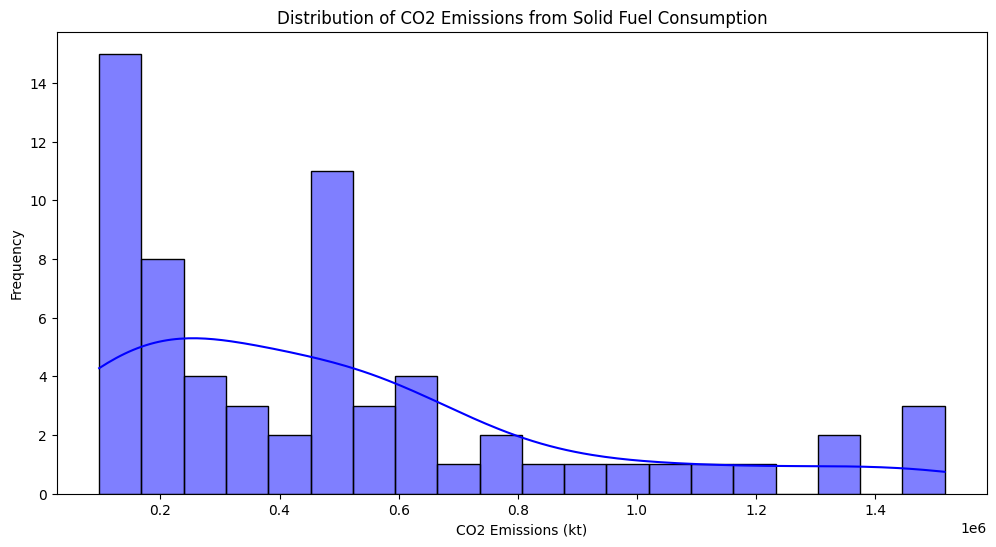

In [ ]:
# Histogram - distribution of 'CO2 emissions from solid fuel consumption'.
fig=plt.figure(figsize=(12, 6))
sns.histplot(df['CO2 emissions from solid fuel consumption (kt)'], bins=20, kde=True, color='blue')
plt.title('Distribution of CO2 Emissions from Solid Fuel Consumption')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Frequency')

histograms_base64 = fig_to_base64(fig)
plt.show()

# Data Cleaning and Preprocessing.

In [ ]:
# Droping unnecessary columns.
df = df.drop(['sno', 'country'], axis=1)

In [ ]:
# Imputing missing values with mean.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Splitting Data Into Test-Train Sets.

In [ ]:
X = df.drop(['year', 'CO2 emissions from solid fuel consumption (kt)'], axis=1)
y = df['CO2 emissions from liquid fuel consumption (kt)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# Training RNN (LSTM) model.

In [ ]:
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_rnn.compile(optimizer='RMSprop', loss='mean_squared_error')

In [ ]:
# Reshaping input data for LSTM.
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
model_rnn.fit(X_train_lstm, y_train, epochs=80, batch_size=32, validation_data=(X_test_lstm, y_test))

Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - loss: 67697750016.0000 - val_loss: 38125862912.0000
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 59769106432.0000 - val_loss: 38125842432.0000
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 71422164992.0000 - val_loss: 38125821952.0000
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 66100482048.0000 - val_loss: 38125801472.0000
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 66947854336.0000 - val_loss: 38125776896.0000
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 66605658112.0000 - val_loss: 38125740032.0000
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 69523570688.0000 - val_loss: 38125686784.0000
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 65351782400.0000 - val_loss: 38125572096.0000
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 65930924032.0000 - val_loss: 38125182976.0000
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 66439917568.00

# Evaluating The Model.

In [ ]:
# Creating evaluater function.
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape((y_pred.shape[0],))
    scores = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
    }
    return scores

In [ ]:
# Applying evaluater function on RNN model.
scores_rnn = evaluate_model(model_rnn, X_test_lstm, y_test)
print("RNN Model Scores:")
print(scores_rnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
RNN Model Scores:
{'R2': 0.13101567077596876, 'MAE': 67647.8194551282, 'MSE': 6313634027.62231}


In [ ]:
# RNN Evaluation percentage.
print("\nRNN Model Scores:")
print("R2: {:.2%}".format(scores_rnn['R2']))
print("MAE: {:.2f}".format(scores_rnn['MAE']))
print("MSE: {:.2f}".format(scores_rnn['MSE']))


RNN Model Scores:
R2: 13.10%
MAE: 67647.82
MSE: 6313634027.62


# Final Results Visualizations for RNN-LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


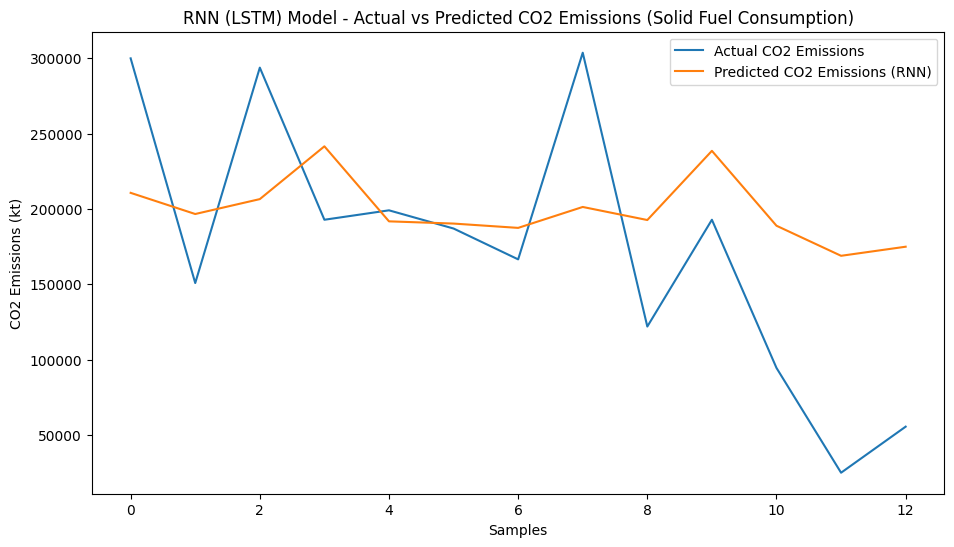

In [ ]:
# Visualizing predictions vs actual values for RNN model.
fig=plt.figure(figsize=(11, 6))
plt.plot(y_test.values, label='Actual CO2 Emissions')
plt.plot(model_rnn.predict(X_test_lstm), label='Predicted CO2 Emissions (RNN)')
plt.title('RNN (LSTM) Model - Actual vs Predicted CO2 Emissions (Solid Fuel Consumption)')
plt.xlabel('Samples')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
rnn_base64 = fig_to_base64(fig)
plt.show()

# XGBoost Regressor (XGBRegressor):

XGBoost Regressor (XGBRegressor):
This is a gradient boosting model that is effective for regression tasks. It combines multiple weak learners (decision trees) to improve prediction accuracy.

Random Forest Regressor (RandomForestRegressor):
This model is an ensemble learning method that builds multiple decision trees during training and outputs the average prediction (for regression) of the individual trees. It helps reduce overfitting and improves accuracy.

Stacked Regressor:
This is a custom neural network model that combines predictions from both the XGBoost and Random Forest models. However, the implementation currently has an issue where it attempts to fit a RandomForestRegressor inside the forward method, which isn't typical for a stacked ensemble. Instead, it should be used to generate predictions based on the outputs from the two base models.
Model Workflow:
Step 1: Train the XGBoost and Random Forest models separately on the training data.
Step 2: Create a stacked model that combines predictions from both the XGBoost and Random Forest models to make final predictions.

In [ ]:
!pip install --upgrade xgboost


In [ ]:
xgb_model = XGBRegressor(n_estimators=50, max_depth=2, learning_rate=0.1, reg_alpha= 1, reg_lambda= 0,verbosity = 1, random_state =0, early_stopping_rounds = 10)
#max_dept from 5 to 3, reg_lambda=1.0,   L2 regularization
    #reg_alpha=0.5,   L1 regularization to stop overfitting
xgb_model.fit(X_train, y_train,eval_set=[(X_test, y_test)])
xgb_scores = {
    "R2": r2_score(y_test, xgb_model.predict(X_test),),
    "MAE": mean_absolute_error(y_test, xgb_model.predict(X_test)),
    "MSE": mean_squared_error(y_test, xgb_model.predict(X_test)),
}
print("XGBoost Model Scores:")
print(xgb_scores)


[0]	validation_0-rmse:80140.54102
[1]	validation_0-rmse:73121.62899
[2]	validation_0-rmse:65220.91987
[3]	validation_0-rmse:58143.26254
[4]	validation_0-rmse:52937.42080
[5]	validation_0-rmse:48376.21489
[6]	validation_0-rmse:43858.34032
[7]	validation_0-rmse:40189.00801
[8]	validation_0-rmse:36724.03461
[9]	validation_0-rmse:33228.61012
[10]	validation_0-rmse:31016.31514
[11]	validation_0-rmse:27989.36634
[12]	validation_0-rmse:25779.35154
[13]	validation_0-rmse:24578.02045
[14]	validation_0-rmse:22498.99961
[15]	validation_0-rmse:21454.21114
[16]	validation_0-rmse:19733.91782
[17]	validation_0-rmse:18191.53752
[18]	validation_0-rmse:16935.87290
[19]	validation_0-rmse:16317.87033
[20]	validation_0-rmse:15031.48110
[21]	validation_0-rmse:14478.62646
[22]	validation_0-rmse:13434.86453
[23]	validation_0-rmse:12751.29409
[24]	validation_0-rmse:12230.84791
[25]	validation_0-rmse:11424.00380
[26]	validation_0-rmse:10703.48445
[27]	validation_0-rmse:10024.21397
[28]	validation_0-rmse:9537.99

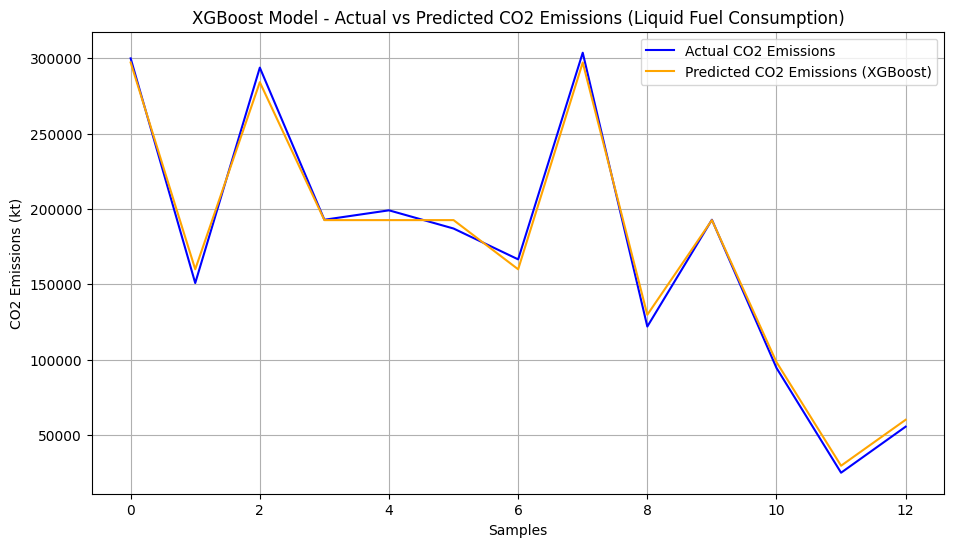

In [ ]:
# Visualizing predictions vs actual values for XGBoost model
fig=plt.figure(figsize=(11, 6))
plt.plot(y_test.values, label='Actual CO2 Emissions', color='blue')
plt.plot(xgb_model.predict(X_test), label='Predicted CO2 Emissions (XGBoost)', color='orange')
plt.title('XGBoost Model - Actual vs Predicted CO2 Emissions (Liquid Fuel Consumption)')
plt.xlabel('Samples')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.grid(True)
xgb_base64 = fig_to_base64(fig)
plt.show()


#Random forest

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=50, random_state=0) #100 to 50
rf_model.fit(X_train, y_train)
rf_scores = {
    "R2": r2_score(y_test, rf_model.predict(X_test)),
    "MAE": mean_absolute_error(y_test, rf_model.predict(X_test)),
    "MSE": mean_squared_error(y_test, rf_model.predict(X_test)),
}
print("Random Forest Model Scores:")
print(rf_scores)


Random Forest Model Scores:
{'R2': 0.994973360895527, 'MAE': 4369.533262564118, 'MSE': 36521210.598719}


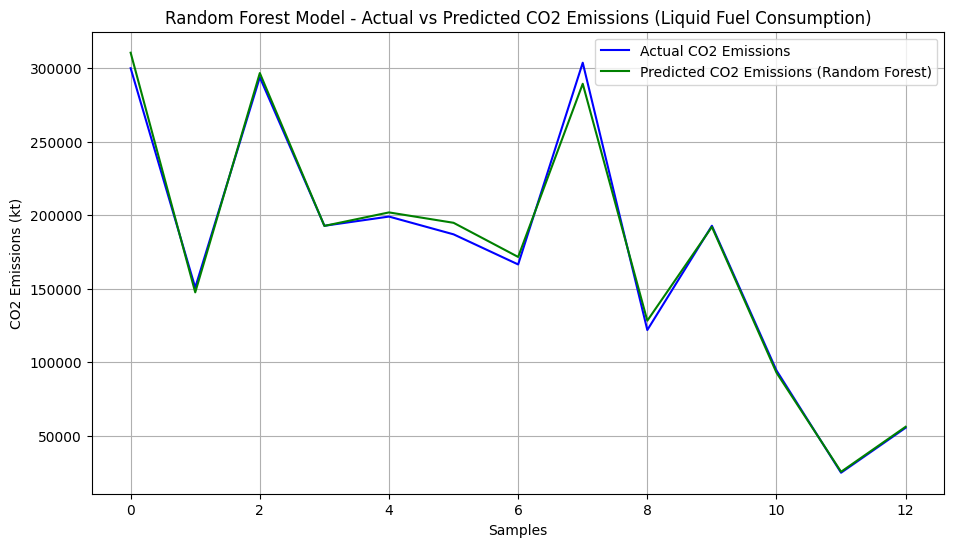

In [ ]:
# Visualizing predictions vs actual values for Random Forest model
fig=plt.figure(figsize=(11, 6))
plt.plot(y_test.values, label='Actual CO2 Emissions', color='blue')
plt.plot(rf_model.predict(X_test), label='Predicted CO2 Emissions (Random Forest)', color='green')
plt.title('Random Forest Model - Actual vs Predicted CO2 Emissions (Liquid Fuel Consumption)')
plt.xlabel('Samples')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.grid(True)
rf_base64 = fig_to_base64(fig)
plt.show()


# Stacked ensemble

In [ ]:

# Stacked Ensemble
class StackedRegressor(nn.Module):
    def __init__(self, xgb_model, rf_model):
        super(StackedRegressor, self).__init__()
        self.xgb_model = xgb_model
        self.rf_model = rf_model
        self.regressor = RandomForestRegressor(n_estimators=100, random_state=0)

    def forward(self, X_xgb, X_rf):
        xgb_preds = self.xgb_model.predict(X_xgb)
        rf_preds = self.rf_model.predict(X_rf)
        stacked_input = np.column_stack((xgb_preds, rf_preds))
        output = self.regressor.fit(stacked_input, y_train)  # Training the regressor
        return output


In [ ]:
stacked_model = StackedRegressor(xgb_model, rf_model)

# Prepare the input for the stacked model
stacked_model_input = np.column_stack((xgb_model.predict(X_train), rf_model.predict(X_train)))
stacked_model_output = stacked_model.forward(X_train, X_train)


In [ ]:
# Evaluate the stacked ensemble
stacked_preds = []
stacked_true = []
xgb_test_preds = xgb_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
stacked_input_test = np.column_stack((xgb_test_preds, rf_test_preds))

stacked_preds = stacked_model.regressor.predict(stacked_input_test)
stacked_true = y_test.values


In [ ]:
stacked_scores = {
    "R2": r2_score(stacked_true, stacked_preds),
    "MAE": mean_absolute_error(stacked_true, stacked_preds),
    "MSE": mean_squared_error(stacked_true, stacked_preds),
}
print("Stacked Ensemble Model Scores:")
print(stacked_scores)

Stacked Ensemble Model Scores:
{'R2': 0.9967960448534189, 'MAE': 3330.0184864102903, 'MSE': 23278440.768308595}


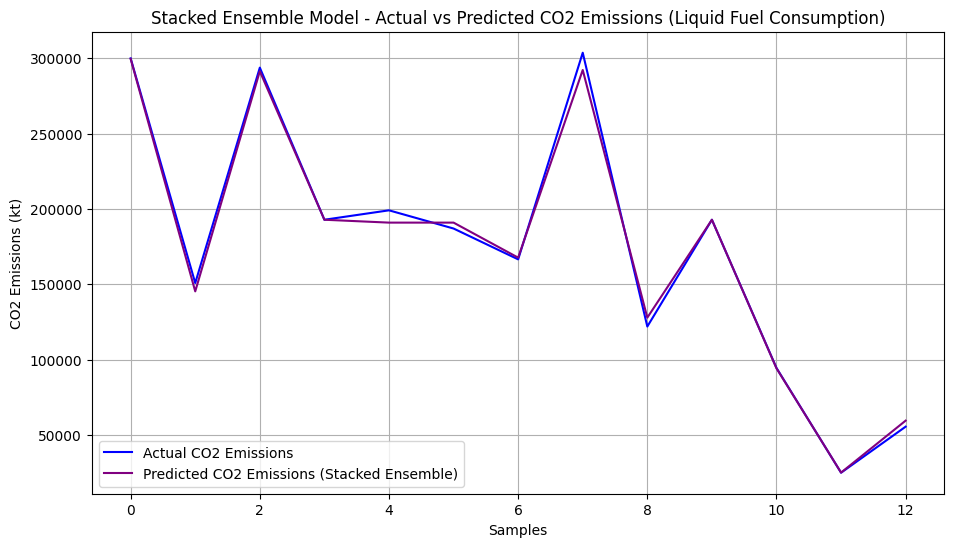

In [ ]:
# Visualizing predictions vs actual values for Stacked Ensemble model
fig=plt.figure(figsize=(11, 6))
plt.plot(stacked_true, label='Actual CO2 Emissions', color='blue')
plt.plot(stacked_preds, label='Predicted CO2 Emissions (Stacked Ensemble)', color='purple')
plt.title('Stacked Ensemble Model - Actual vs Predicted CO2 Emissions (Liquid Fuel Consumption)')
plt.xlabel('Samples')
plt.ylabel('CO2 Emissions (kt)')
plt.legend()
plt.grid(True)
stacked_base64 = fig_to_base64(fig)
plt.show()


<ipython-input-77-c33dfb4d35d5>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




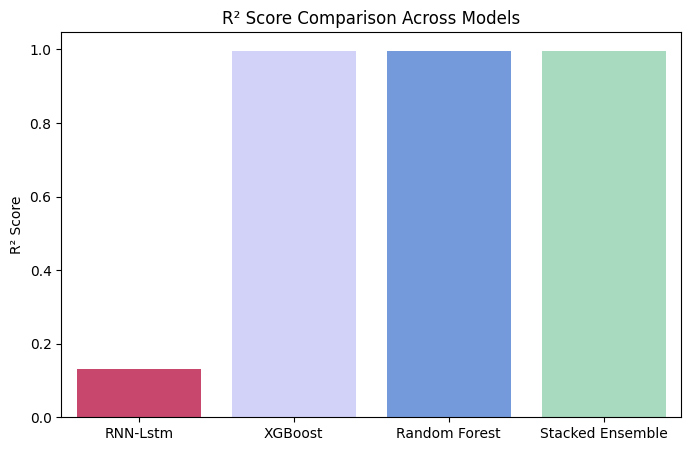

In [ ]:
# Accuracy Graph: Comparison of R² Score
custom_colors = ['#DE3163', '#CCCCFF', '#6495ED', '#9FE2BF']
model_names = ['RNN-Lstm','XGBoost', 'Random Forest', 'Stacked Ensemble']
r2_scores = [scores_rnn['R2'],xgb_scores["R2"], rf_scores["R2"], stacked_scores["R2"]]

fig=plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=r2_scores, palette=custom_colors)
plt.title('R² Score Comparison Across Models')
plt.ylabel('R² Score')
com_base64 = fig_to_base64(fig)
plt.show()


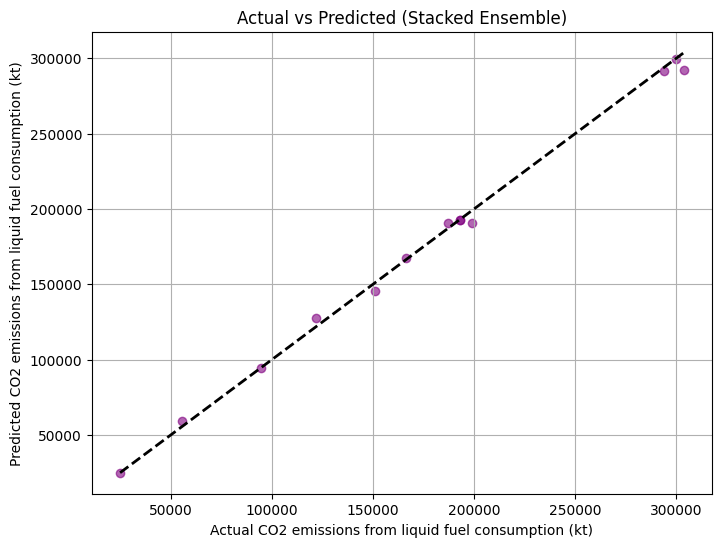

In [ ]:
# Actual vs Predicted: Stacked Ensemble Model
plt.figure(figsize=(8, 6))
plt.scatter(stacked_true, stacked_preds, color='purple', alpha=0.6)
plt.plot([min(stacked_true), max(stacked_true)], [min(stacked_true), max(stacked_true)], color='black', lw=2, linestyle='--')
plt.title('Actual vs Predicted (Stacked Ensemble)')
plt.xlabel('Actual CO2 emissions from liquid fuel consumption (kt)')
plt.ylabel('Predicted CO2 emissions from liquid fuel consumption (kt)')
plt.grid(True)
plt.show()

# cross validation and learning curve


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBRegressor(random_state=0), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {grid_search.best_params_}")


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


In [ ]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare your features and target
# Assuming X and y are defined and your data is already loaded

# Initialize the model
xgb_model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=0)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
cross_val_r2_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')

# Fit the model on the entire dataset
xgb_model.fit(X, y)

# Make predictions
y_pred = xgb_model.predict(X)

# Calculate evaluation metrics
xgb_scores = {
    "R2": r2_score(y, y_pred),
    "MAE": mean_absolute_error(y, y_pred),
    "MSE": mean_squared_error(y, y_pred),
}

print("XGBoost Cross-Validation R2 Scores:", cross_val_r2_scores)
print("Mean Cross-Validation R2 Score:", cross_val_r2_scores.mean())
print("XGBoost Model Scores:", xgb_scores)


XGBoost Cross-Validation R2 Scores: [0.99063155 0.94253554 0.99237744 0.98694709 0.9780921 ]
Mean Cross-Validation R2 Score: 0.9781167442476271
XGBoost Model Scores: {'R2': 0.9999999979472971, 'MAE': 4.869704671223587, 'MSE': 46.06710829077189}


In [ ]:
!pip install dash

In [ ]:
!pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 1.6 MB/s eta 0:00:00


In [ ]:
# Dashboard
import dash
from dash import dash_table
import dash_bootstrap_components as dbc
from dash import dcc,html
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools as tls
app = dash.Dash(external_stylesheets=[dbc.themes.QUARTZ])
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#36454F",
}

CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}
#nav links
sidebar = html.Div(
    [
        html.H4("INDEX", className="display-8", ),
        dbc.Button(
         "click to check co2 levels!",
        className="btn btn-primary",
        href="#9",
        external_link=True ),
        dbc.Nav(
            [
                dbc.NavLink("Data Overview", href="#0", external_link=True),
                dbc.NavLink("Training the RNN-LSTM Model", href="#4",external_link=True),
                dbc.NavLink("XGBoost model results", href="#5",external_link=True),
                dbc.NavLink("Random Forest classifier results", href="#6",external_link=True),
                dbc.NavLink("Stacked ensemble", href="#7",external_link=True),
                dbc.NavLink("Comparison of all models", href="#8",external_link=True),

            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)



# content area
content = html.Div(
            html.Div( [html.H1("CO2 EMISSION PREDICTOR", style={
                        "top": "0",
                        "backgroundColor": "black",
                          "textAlign": "center"
                    })]+[html.Br()]*5+
                            [html.H2("DATA OVERVIEW",id="0")]+
                            [
                              dash_table.DataTable(data=data.to_dict('records'),
                                 columns=[{'id': c, 'name': c} for c in data.columns],
                                style_table={'overflowX': 'auto'},
                                style_cell={'height': 'auto','minWidth': '180px', 'width': '180px', 'maxWidth': '180px',
                                'whiteSpace': 'normal'} ,
                                 page_size=10,style_header={ 'backgroundColor': '#36454F','fontWeight': 'bold'},
                                 style_data={'backgroundColor': 'rgb(50, 50, 50)'})]+
                       [html.Img(src='data:image/png;base64,{}'.format(histograms_base64),style={'width':'100%','height':'auto%','display':'block','margin':'0 auto}'})]+   [html.Br()]*3+


                            [html.H2("TRAINING THE RNN-LSTM MODEL",id="4")]+
                            [html.Img(src='data:image/png;base64,{}'.format(rnn_base64),style={'width':'100%','height':'auto%','display':'block','margin':'0 auto}'})]+
                      [html.H2("XGBOOST MODEL RESULTS",id="5")]+
                      [html.Img(src='data:image/png;base64,{}'.format(xgb_base64),style={'width':'100%','height':'auto%','display':'block','margin':'0 auto'})]+
                      [html.H2("RANDOM FOREST CLASSIFIER RESULTS",id="6")]+
                      [html.Img(src='data:image/png;base64,{}'.format(rf_base64),style={'width':'100%','height':'auto%','display':'block','margin':'0 auto'})]+
                      [html.H2("STACKED ENSEMBLE",id="7")]+
                      [html.Img(src='data:image/png;base64,{}'.format(stacked_base64),style={'width':'100%','height':'auto%','display':'block','margin':'0 auto'})]+
                      [html.H2("COMPARISON OF ALL MODELS",id="8")]+
                      [html.Img(src='data:image/png;base64,{}'.format(com_base64),style={'width':'100%','height':'auto%','display':'block','margin':'0 auto'})]

    ), id="page-content", style=CONTENT_STYLE)

app.layout=html.Div([sidebar,content])



if __name__ == '__main__':
    app.run()


<IPython.core.display.Javascript object>